## !! CE PROJET EST TOUJOURS DANS SON ÉTAT BROUILLON !!

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:

df = pd.read_csv("C:\\Users\\shera\\Downloads\\cdc2.csv")
print(df)

        _STATE  FMONTH  PVTRESD1  COLGHOUS  STATERE1  SEXVAR  GENHLTH  \
0          1.0     1.0       1.0       NaN       1.0     2.0      2.0   
1          1.0     1.0       1.0       NaN       1.0     2.0      1.0   
2          1.0     1.0       1.0       NaN       1.0     2.0      2.0   
3          1.0     1.0       1.0       NaN       1.0     2.0      1.0   
4          1.0     1.0       1.0       NaN       1.0     2.0      4.0   
...        ...     ...       ...       ...       ...     ...      ...   
445127    78.0    11.0       NaN       NaN       NaN     2.0      3.0   
445128    78.0    11.0       NaN       NaN       NaN     2.0      1.0   
445129    78.0    11.0       NaN       NaN       NaN     2.0      5.0   
445130    78.0    11.0       NaN       NaN       NaN     1.0      2.0   
445131    78.0    11.0       NaN       NaN       NaN     1.0      2.0   

        PHYSHLTH  MENTHLTH  PERSDOC3  ...  USEMRJN4  TYPCNTR9  _AGE80   HTM4  \
0           88.0      88.0       1.0  ...  

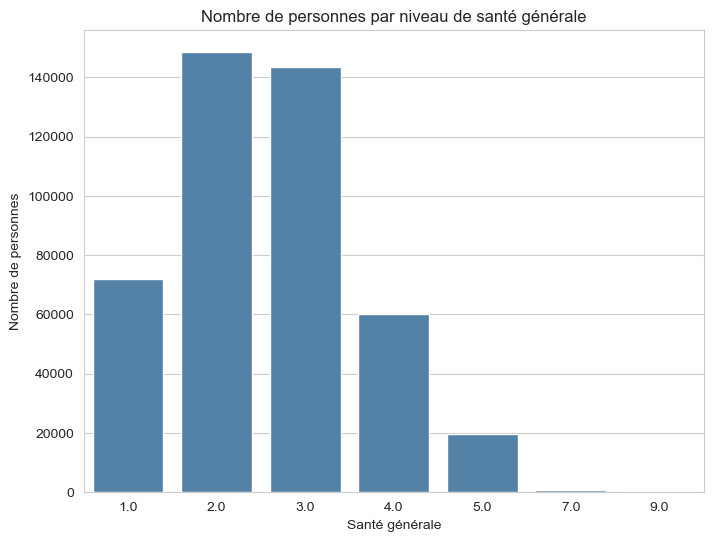

In [3]:
health_counts = df['GENHLTH'].value_counts()
sns.set_style("whitegrid")
plt.figure(figsize=(8, 6))  
sns.barplot(x=health_counts.index, y=health_counts.values, color='steelblue')
plt.title("Nombre de personnes par niveau de santé générale")
plt.xlabel("Santé générale")
plt.ylabel("Nombre de personnes")
plt.show()



<Figure size 1000x600 with 0 Axes>

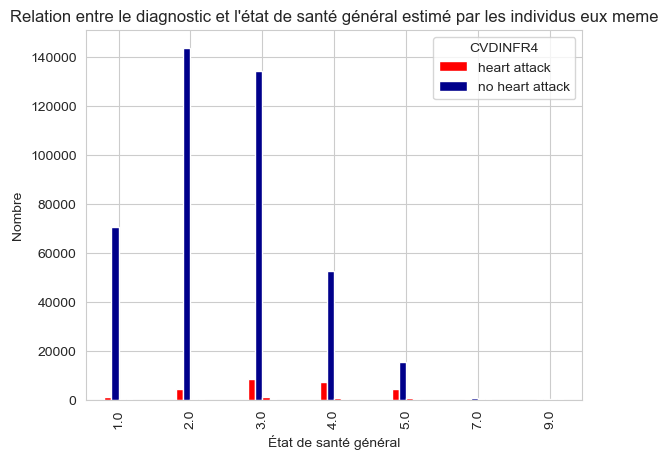

CVDINFR4   1.0     2.0  7.0  9.0
GENHLTH                         
1.0       1097   70526  207   48
2.0       4214  143753  409   68
3.0       8295  134255  948   98
4.0       7228   52300  702   43
5.0       4161   15143  416   21
7.0         86     688   34    2
9.0         27     293   15   50


In [4]:

combien_de_malades = df.groupby('GENHLTH')['CVDINFR4'].value_counts().unstack(fill_value=0) # Fréquence de chaque diagnostic par rapport à leur état de santé général
plt.figure(figsize=(10, 6))
combien_de_malades.plot(kind='bar', color=['red', 'darkblue'], width=0.4) 
plt.title("Relation entre le diagnostic et l'état de santé général estimé par les individus eux meme")
plt.xlabel("État de santé général")
plt.ylabel("Nombre")
plt.legend(title='CVDINFR4', labels=["heart attack", "no heart attack"]) 
plt.show()
print(combien_de_malades)




In [5]:
import numpy as np

In [6]:
categorical = df.select_dtypes(include=[object])
print(categorical.columns)

Index([], dtype='object')


In [7]:
numerical = df.select_dtypes(include=[np.number])
print(numerical.columns)

Index(['_STATE', 'FMONTH', 'PVTRESD1', 'COLGHOUS', 'STATERE1', 'SEXVAR',
       'GENHLTH', 'PHYSHLTH', 'MENTHLTH', 'PERSDOC3', 'MEDCOST1', 'CHECKUP1',
       'EXERANY2', 'SLEPTIM1', 'LASTDEN4', 'RMVTETH4', 'CVDINFR4', 'CVDCRHD4',
       'CVDSTRK3', 'ASTHMA3', 'ASTHNOW', 'CHCSCNC1', 'CHCOCNC1', 'CHCCOPD3',
       'ADDEPEV3', 'CHCKDNY2', 'HAVARTH4', 'DIABETE4', 'DIABAGE4', 'MARITAL',
       'EDUCA', 'NUMPHON4', 'CPDEMO1C', 'VETERAN3', 'EMPLOY1', 'CHILDREN',
       'INCOME3', 'PREGNANT', 'DEAF', 'BLIND', 'DIFFWALK', 'SMOKDAY2',
       'USENOW3', 'ECIGNOW2', 'LCSNUMCG', 'ALCDAY4', 'DIABTYPE', 'INSULIN1',
       'COPDSMOK', 'CNCRAGE', 'CNCRTYP2', 'CIMEMLOS', 'ACEDEPRS', 'ACEDRINK',
       'ACEDRUGS', 'ACEHURT1', 'LSATISFY', 'EMTSUPRT', 'SDHISOLT', 'SDHFOOD1',
       'SDHBILLS', 'SDHSTRE1', 'MARIJAN1', 'USEMRJN4', 'TYPCNTR9', '_AGE80',
       'HTM4', 'WTKG3', '_BMI5', '_YRSSMOK', '_PACKDAY', '_PACKYRS',
       '_DRNKWK2'],
      dtype='object')


In [8]:
df2 = df.rename(columns={'_STATE': 'state', 'FMONTH': 'file_month', 'PVTRESD1': 'private_residence', 'COLGHOUS': 'college_housing', 'STATERE1': 'resident_of_state', 'SEXVAR': 'sex_respondant', 'GENHLTH': 'general_health', 'PHYSHLTH': 'physical_health', 'MENTHLTH': 'mental_health', 'PERSDOC3': 'personal_hc_provider', 'MEDCOST1': 'not_afford_doc', 'CHECKUP1': 'last_checkup', 'EXERANY2': 'exercise_last_30_days', 'SLEPTIM1': 'sleep_time', 'LASTDEN4': 'last_dentist_checkup', 'RMVTETH4': 'num_permanent_teeth_removed', 'CVDINFR4': 'diagnosed_heart_attack', 'CVDCRHD4': 'diagnosed_angina_chd', 'CVDSTRK3': 'diagnosed_stroke', 'ASTHMA3': 'diagnosed_asthma', 'ASTHNOW': 'still_have_asthma', 'CHCSCNC1': 'told_had_skin_cancer', 'CHCOCNC1': 'told_had_melanoma_or_cancer', 'CHCCOPD3': 'told_had_bronchitis_emphysema_copd', 'ADDEPEV3': 'told_had_depressive_disorder', 'CHCKDNY2': 'told_had_kidney_disease', 'HAVARTH4': 'told_had_arthritis', 'DIABETE4': 'told_had_diabetes', 'MARITAL': 'marital_status', 'EDUCA': 'educational_level', 'VETERAN3': 'veteran', 'EMPLOY1': 'employment_status', 'CHILDREN': 'num_children', 'INCOME3': 'income_level', 'PREGNANT': 'pregnant', 'DEAF': 'deaf', 'BLIND': 'blind', 'DIFFWALK': 'difficulty_walking', 'SMOKDAY2': 'smoking_days', 'USENOW3': 'snus_chemma', 'ECIGNOW2': 'e_cigs_vaping', 'LCSNUMCG': 'cigarettes_a_day', 'ALCDAY4': 'alcohol_last_30', 'DIABTYPE': 'diabetes_type', 'INSULIN1': 'taking_insulin', 'COPDSMOK': 'years_smoking_tobacco', 'CNCRAGE': 'cancer_age', 'CNCRTYP2': 'cancer_type', 'CIMEMLOS': 'memory_loss', 'ACEDEPRS': 'living_with_depressed', 'ACEDRINK': 'living_with_alcoholic', 'ACEDRUGS': 'living_with_drogué', 'ACEHURT1': 'parent_hirt_physically', 'LSATISFY': 'life_satisfaction', 'EMTSUPRT': 'got_emotional_support', 'SDHISOLT': 'feel_socially_isolated', 'SDHFOOD1':'food_didnt_last', 'SDHBILLS': 'not_able_pay_bills', 'SDHSTRE1': 'stress', 'MARIJAN1': 'used_marijuana', 'TYPCNTR9': 'contraception_method', 'HTM4': 'height', 'WTKG3':'weight', '_BMI5': 'BMI', '_YRSSMOK': 'num_smoking_years', '_PACKDAY': 'packs_cigs_day', '_PACKYRS': 'packs_cigs_years', '_DRNKWK2': 'alcohol_per_week'})


In [9]:
print(df['DIABAGE4']) #NaN values
print(df['NUMPHON4']) #NaN values except the first 2
print(df['CPDEMO1C']) #not in the code book
print(df['USEMRJN4']) #NaN values


0         80.0
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
445127     NaN
445128     NaN
445129     NaN
445130     NaN
445131     NaN
Name: DIABAGE4, Length: 445132, dtype: float64
0         1.0
1         2.0
2         NaN
3         NaN
4         NaN
         ... 
445127    NaN
445128    NaN
445129    NaN
445130    NaN
445131    NaN
Name: NUMPHON4, Length: 445132, dtype: float64
0         2.0
1         1.0
2         1.0
3         1.0
4         2.0
         ... 
445127    2.0
445128    1.0
445129    1.0
445130    1.0
445131    1.0
Name: CPDEMO1C, Length: 445132, dtype: float64
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
445127   NaN
445128   NaN
445129   NaN
445130   NaN
445131   NaN
Name: USEMRJN4, Length: 445132, dtype: float64


In [10]:
print(df2)

        state  file_month  private_residence  college_housing  \
0         1.0         1.0                1.0              NaN   
1         1.0         1.0                1.0              NaN   
2         1.0         1.0                1.0              NaN   
3         1.0         1.0                1.0              NaN   
4         1.0         1.0                1.0              NaN   
...       ...         ...                ...              ...   
445127   78.0        11.0                NaN              NaN   
445128   78.0        11.0                NaN              NaN   
445129   78.0        11.0                NaN              NaN   
445130   78.0        11.0                NaN              NaN   
445131   78.0        11.0                NaN              NaN   

        resident_of_state  sex_respondant  general_health  physical_health  \
0                     1.0             2.0             2.0             88.0   
1                     1.0             2.0             1.0      

In [11]:
df2.to_csv("second_clean.csv", sep=',', index=False)



In [12]:
df3 = pd.read_csv("C:\\Users\\shera\\Downloads\\second_clean00.csv")
print(df3)

        state  file_month  private_residence  college_housing  \
0         1.0         1.0                1.0              NaN   
1         1.0         1.0                1.0              NaN   
2         1.0         1.0                1.0              NaN   
3         1.0         1.0                1.0              NaN   
4         1.0         1.0                1.0              NaN   
...       ...         ...                ...              ...   
445127   78.0        11.0                NaN              NaN   
445128   78.0        11.0                NaN              NaN   
445129   78.0        11.0                NaN              NaN   
445130   78.0        11.0                NaN              NaN   
445131   78.0        11.0                NaN              NaN   

        resident_of_state  sex_respondant  general_health  physical_health  \
0                     1.0             2.0             2.0             88.0   
1                     1.0             2.0             1.0      

In [13]:
print(df3.columns)

Index(['state', 'file_month', 'private_residence', 'college_housing',
       'resident_of_state', 'sex_respondant', 'general_health',
       'physical_health', 'mental_health', 'personal_hc_provider',
       'not_afford_doc', 'last_checkup', 'exercise_last_30_days', 'sleep_time',
       'last_dentist_checkup', 'num_permanent_teeth_removed',
       'diagnosed_heart_attack', 'diagnosed_angina_chd', 'diagnosed_stroke',
       'diagnosed_asthma', 'still_have_asthma', 'told_had_skin_cancer',
       'told_had_melanoma_or_cancer', 'told_had_bronchitis_emphysema_copd',
       'told_had_depressive_disorder', 'told_had_kidney_disease',
       'told_had_arthritis', 'told_had_diabetes', 'DIABAGE4', 'marital_status',
       'educational_level', 'NUMPHON4', 'CPDEMO1C', 'veteran',
       'employment_status', 'num_children', 'income_level', 'pregnant', 'deaf',
       'blind', 'difficulty_walking', 'smoking_days', 'snus_chemma',
       'e_cigs_vaping', 'cigarettes_a_day', 'alcohol_last_30', 'diabetes_t

In [14]:
df3['_AGE80'].astype(int)

0         80
1         80
2         56
3         73
4         43
          ..
445127    19
445128    51
445129    65
445130    73
445131    42
Name: _AGE80, Length: 445132, dtype: int32

In [15]:

df3.describe()[1:][list(df3)].T.style.background_gradient(cmap='Blues')


,mean,std,min,25%,50%,75%,max
state,31.005942,16.652065,1.000000,18.000000,30.000000,46.000000,78.000000
file_month,6.767667,3.463248,1.000000,4.000000,7.000000,10.000000,12.000000
private_residence,1.000198,0.014063,1.000000,1.000000,1.000000,1.000000,2.000000
college_housing,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
resident_of_state,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
sex_respondant,1.529939,0.499103,1.000000,1.000000,2.000000,2.000000,2.000000
general_health,2.580133,1.084509,1.000000,2.000000,3.000000,3.000000,9.000000
physical_health,59.178589,37.584444,1.000000,14.000000,88.000000,88.000000,99.000000
mental_health,58.418234,37.835814,1.000000,14.000000,88.000000,88.000000,99.000000
personal_hc_provider,1.627545,0.921662,1.000000,1.000000,1.000000,2.000000,9.000000


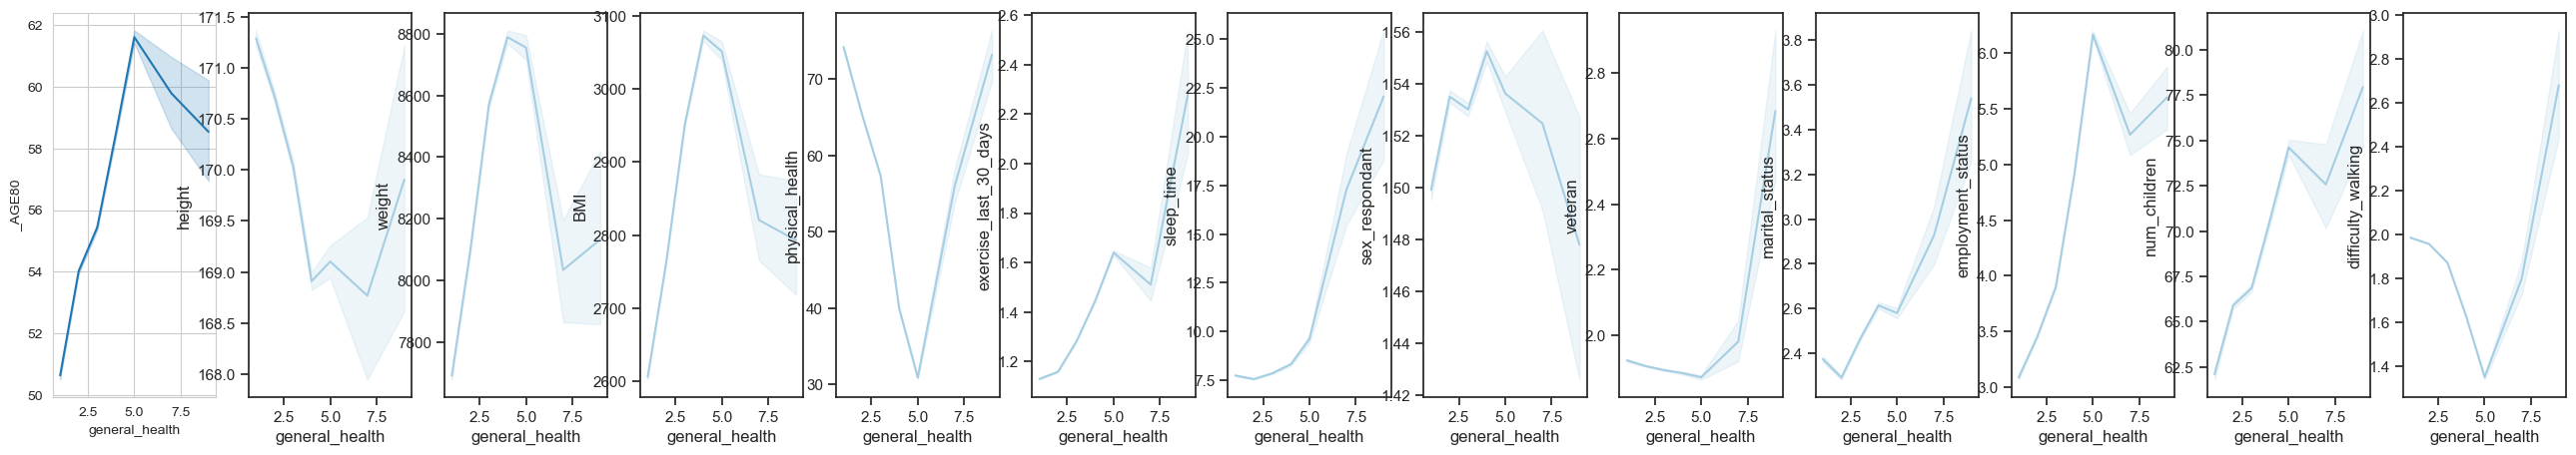

In [16]:
def numeric_features_func(f):
    plt.figure(figsize=(35, 5))
    i = 1
    new = df3.filter(items=['_AGE80', 'height', 'weight', 'BMI', 'physical_health', 'exercise_last_30_days', 'sleep_time', 'sex_respondant', 'veteran', 'marital_status', 'education_level', 'employment_status', 'num_children', 'difficulty_walking'])
    for feature in new.columns:
        plt.subplot(1, 14, i)
        sns.set(palette='Paired')
        sns.set_style("ticks")
        sns.lineplot(y=new[feature], x=df3[f])
        i += 1

numeric_features_func('general_health')  


In [17]:
df3['physical_health']

0         88.0
1         88.0
2          2.0
3         88.0
4          2.0
          ... 
445127    88.0
445128     2.0
445129    30.0
445130    88.0
445131    88.0
Name: physical_health, Length: 445132, dtype: float64

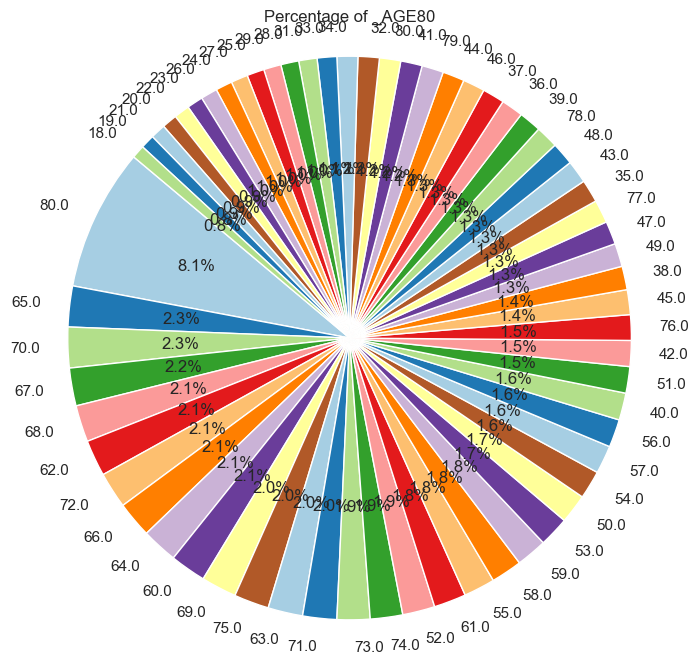

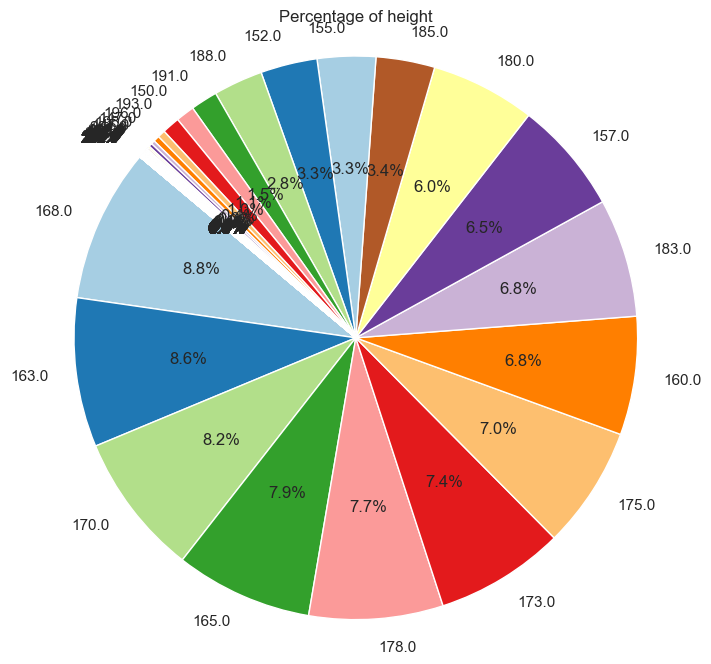

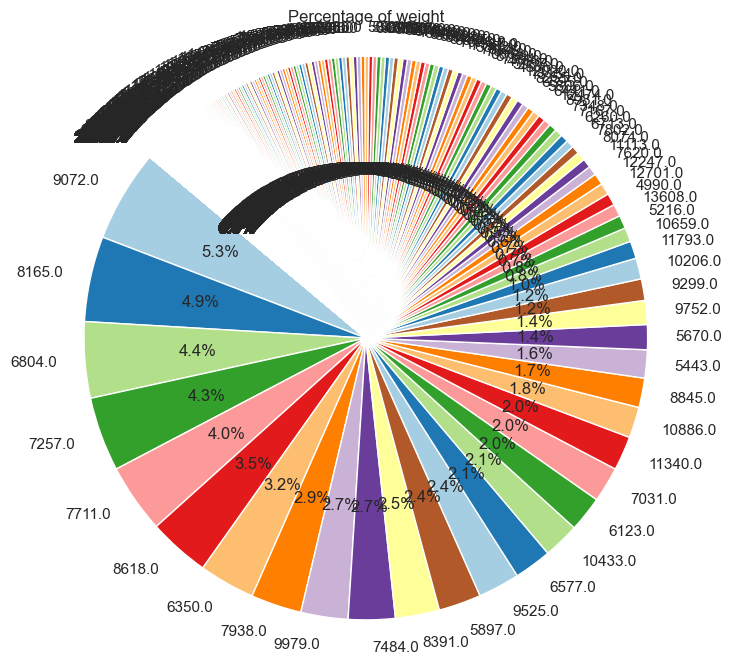

In [18]:
import matplotlib.pyplot as plt

def draw_pie_plot(df, attribute):
 
    attribute_counts = df3[attribute].value_counts()
   
    percentages = attribute_counts / len(df3) * 100
    
  
    plt.figure(figsize=(8, 8))
    plt.pie(percentages, labels=attribute_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"Percentage of {attribute}")
    plt.axis('equal') 
    plt.show()


attributes_to_plot = ['_AGE80', 'height', 'weight']
for attribute in attributes_to_plot:
    draw_pie_plot(df3, attribute)


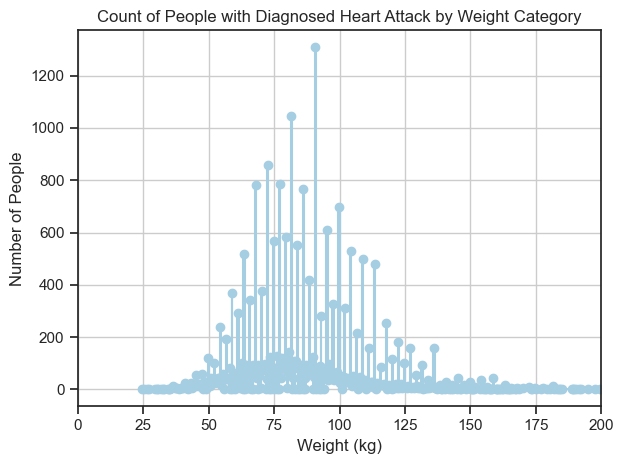

In [19]:
df_filtered = df3[df3['diagnosed_heart_attack'] == 1].copy()
df_filtered['weight'] = df_filtered['weight'] / 100
count_by_weight = df_filtered.groupby('weight').size()
plt.step(count_by_weight.index, count_by_weight.values, where='mid', marker='o')
plt.xlabel('Weight (kg)')
plt.ylabel('Number of People')
plt.title('Count of People with Diagnosed Heart Attack by Weight Category')
plt.grid(True)
plt.xlim(0, 200)  
plt.tight_layout()
plt.show()


In [20]:
len(df3[(df3['weight'] >=12000) & (df3['weight'] <= 12500)])


6530

In [21]:
len(df3[(df3['weight'] >= 8000) & (df3['weight'] <= 8500)])


39934

In [22]:
len(df3)

445132

In [23]:
women=df3[df3['sex_respondant'] == 2]
print(women)

        state  file_month  private_residence  college_housing  \
0         1.0         1.0                1.0              NaN   
1         1.0         1.0                1.0              NaN   
2         1.0         1.0                1.0              NaN   
3         1.0         1.0                1.0              NaN   
4         1.0         1.0                1.0              NaN   
...       ...         ...                ...              ...   
445119   78.0        11.0                NaN              NaN   
445123   78.0        11.0                NaN              NaN   
445127   78.0        11.0                NaN              NaN   
445128   78.0        11.0                NaN              NaN   
445129   78.0        11.0                NaN              NaN   

        resident_of_state  sex_respondant  general_health  physical_health  \
0                     1.0             2.0             2.0             88.0   
1                     1.0             2.0             1.0      

In [24]:
len(women)

235893

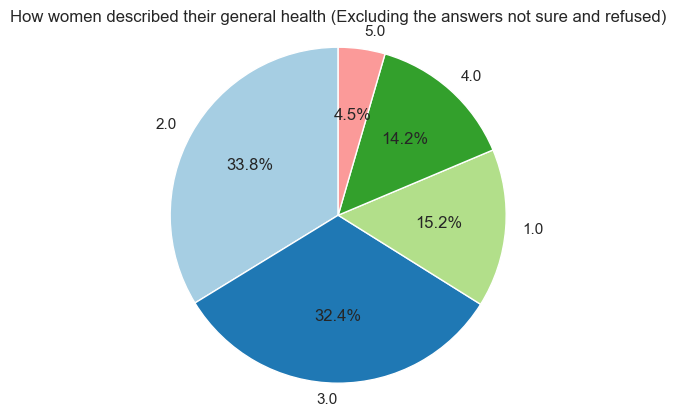

In [25]:
women_filtrées= women[(women['general_health'] != 7) & (women['general_health'] != 9)]
health_counts = women_filtrées['general_health'].value_counts()
fig, ax = plt.subplots()
ax.pie(health_counts, labels=health_counts.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('How women described their general health (Excluding the answers not sure and refused)')
plt.show()


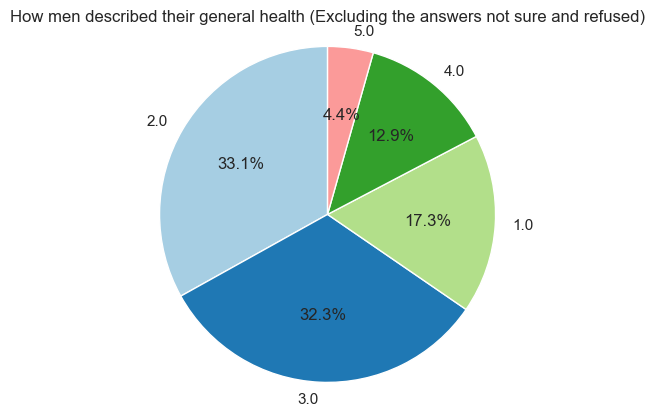

In [26]:
men=df3[df3['sex_respondant'] == 1]
men_filtrées= men[(men['general_health'] != 7) & (men['general_health'] != 9)]
health_counts = men_filtrées['general_health'].value_counts()
fig, ax = plt.subplots()
ax.pie(health_counts, labels=health_counts.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')
ax.set_title('How men described their general health (Excluding the answers not sure and refused)')
plt.show()


In [27]:
df3['difficulty_walking']

0         2.0
1         2.0
2         2.0
3         2.0
4         2.0
         ... 
445127    2.0
445128    2.0
445129    2.0
445130    2.0
445131    1.0
Name: difficulty_walking, Length: 445132, dtype: float64

In [28]:
physical_health_bad_10_days_cvd = df[(df['PHYSHLTH'] <= 10) & (df['PHYSHLTH'] >= 0) & (~df['SLEPTIM1'].isin([77, 99])) & ((df['CVDCRHD4'] == 1) | (df['CVDINFR4'] == 1) | (df['CVDSTRK3'] == 1))].copy()
physical_health_bad_20_days_cvd = df[(df['PHYSHLTH'] <= 20) & (df['PHYSHLTH'] >= 10) & (~df['SLEPTIM1'].isin([77, 99])) & ((df['CVDCRHD4'] == 1) | (df['CVDINFR4'] == 1) | (df['CVDSTRK3'] == 1))].copy()
physical_health_bad_30_days_cvd = df[(df['PHYSHLTH'] <= 30) & (df['PHYSHLTH'] >= 20) & (~df['SLEPTIM1'].isin([77, 99])) & ((df['CVDCRHD4'] == 1) | (df['CVDINFR4'] == 1) | (df['CVDSTRK3'] == 1))].copy()


In [29]:
# Iterate over the 'CHILDREN' column and print each value along with its index
for index, value in physical_health_bad_30_days_cvd['CHILDREN'].items():
    print(f"Index: {index}, Value: {value}")


Index: 22, Value: 88.0
Index: 26, Value: 88.0
Index: 31, Value: 88.0
Index: 70, Value: 88.0
Index: 114, Value: 88.0
Index: 118, Value: 88.0
Index: 146, Value: 88.0
Index: 153, Value: 88.0
Index: 176, Value: 88.0
Index: 187, Value: 88.0
Index: 216, Value: 88.0
Index: 228, Value: 88.0
Index: 235, Value: 88.0
Index: 245, Value: 88.0
Index: 263, Value: 88.0
Index: 278, Value: 88.0
Index: 286, Value: 88.0
Index: 302, Value: 88.0
Index: 319, Value: 1.0
Index: 326, Value: 88.0
Index: 366, Value: 88.0
Index: 387, Value: 88.0
Index: 397, Value: 88.0
Index: 406, Value: 88.0
Index: 417, Value: 4.0
Index: 456, Value: 88.0
Index: 467, Value: 88.0
Index: 478, Value: 88.0
Index: 491, Value: 88.0
Index: 500, Value: 88.0
Index: 502, Value: 88.0
Index: 508, Value: 88.0
Index: 526, Value: 88.0
Index: 542, Value: 1.0
Index: 552, Value: 88.0
Index: 555, Value: 88.0
Index: 567, Value: 88.0
Index: 576, Value: 88.0
Index: 612, Value: 88.0
Index: 625, Value: 88.0
Index: 638, Value: 88.0
Index: 647, Value: 88.0

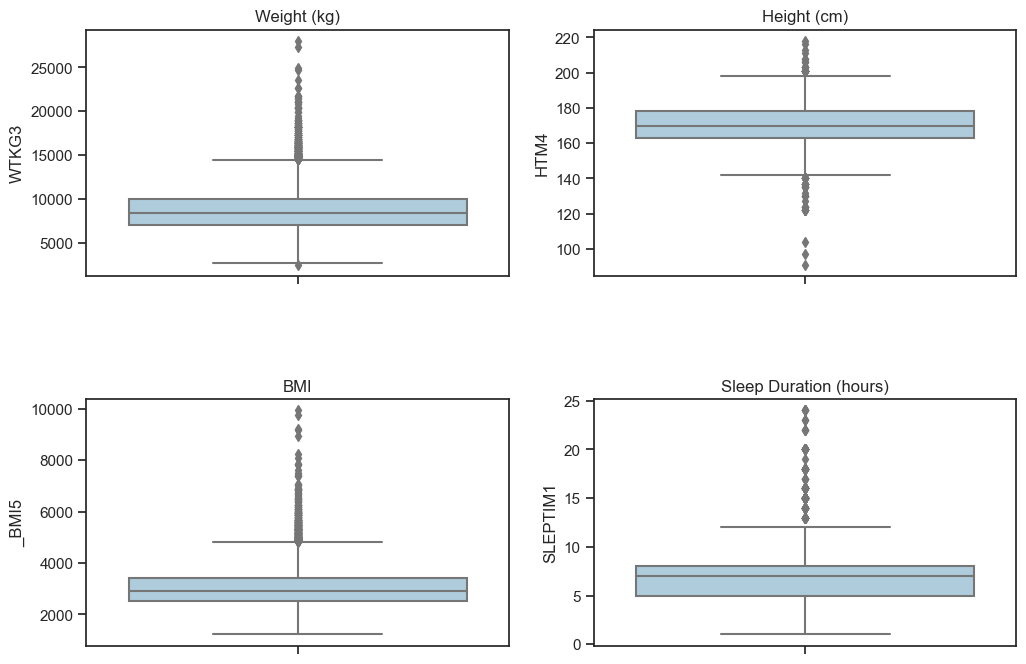

In [30]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Weight
sns.boxplot(y='WTKG3', data=physical_health_bad_30_days_cvd, ax=axes[0, 0])
axes[0, 0].set_title('Weight (kg)')
axes[0, 0].set_xlabel('')

# Height
sns.boxplot(y='HTM4', data=physical_health_bad_30_days_cvd, ax=axes[0, 1])
axes[0, 1].set_title('Height (cm)')
axes[0, 1].set_xlabel('')

# BMI
sns.boxplot(y='_BMI5', data=physical_health_bad_30_days_cvd, ax=axes[1, 0])
axes[1, 0].set_title('BMI')
axes[1, 0].set_xlabel('')

# Sleep Duration
sns.boxplot(y='SLEPTIM1', data=physical_health_bad_30_days_cvd, ax=axes[1, 1])
axes[1, 1].set_title('Sleep Duration (hours)')
axes[1, 1].set_xlabel('')

plt.subplots_adjust(hspace=0.5)
plt.show()

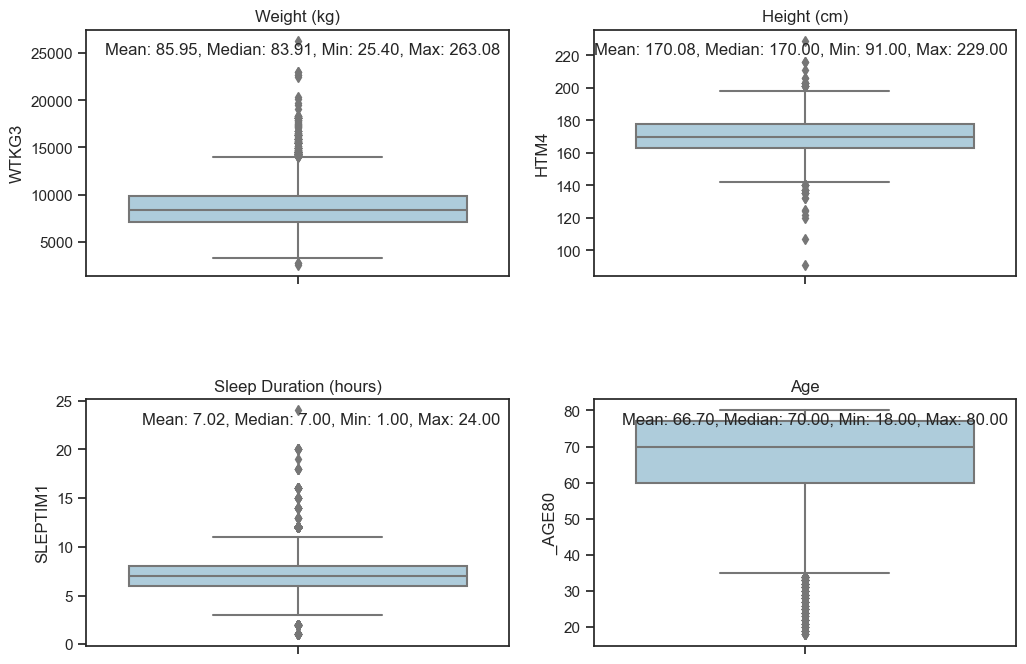

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Weight
weight_stats = physical_health_bad_10_days_cvd['WTKG3'].describe()
sns.boxplot(y='WTKG3', data=physical_health_bad_10_days_cvd, ax=axes[0, 0])
axes[0, 0].set_title('Weight (kg)')
axes[0, 0].set_xlabel('')
axes[0, 0].text(0.98, 0.95, f'Mean: {weight_stats["mean"]/100:.2f}, Median: {weight_stats["50%"]/100:.2f}, Min: {weight_stats["min"]/100:.2f}, Max: {weight_stats["max"]/100:.2f}', transform=axes[0, 0].transAxes, ha='right', va='top')

# Height
height_stats = physical_health_bad_10_days_cvd['HTM4'].describe()
sns.boxplot(y='HTM4', data=physical_health_bad_10_days_cvd, ax=axes[0, 1])
axes[0, 1].set_title('Height (cm)')
axes[0, 1].set_xlabel('')
axes[0, 1].text(0.98, 0.95, f'Mean: {height_stats["mean"]:.2f}, Median: {height_stats["50%"]:.2f}, Min: {height_stats["min"]:.2f}, Max: {height_stats["max"]:.2f}', transform=axes[0, 1].transAxes, ha='right', va='top')

# Sleep Duration
sleep_stats = physical_health_bad_10_days_cvd['SLEPTIM1'].describe()
sns.boxplot(y='SLEPTIM1', data=physical_health_bad_10_days_cvd, ax=axes[1, 0])
axes[1, 0].set_title('Sleep Duration (hours)')
axes[1, 0].set_xlabel('')
axes[1, 0].text(0.98, 0.95, f'Mean: {sleep_stats["mean"]:.2f}, Median: {sleep_stats["50%"]:.2f}, Min: {sleep_stats["min"]:.2f}, Max: {sleep_stats["max"]:.2f}', transform=axes[1, 0].transAxes, ha='right', va='top')

# Age
age_stats = physical_health_bad_10_days_cvd['_AGE80'].describe()
sns.boxplot(y='_AGE80', data=physical_health_bad_10_days_cvd, ax=axes[1, 1])
axes[1, 1].set_title('Age')
axes[1, 1].set_xlabel('')
axes[1, 1].text(0.98, 0.95, f'Mean: {age_stats["mean"]:.2f}, Median: {age_stats["50%"]:.2f}, Min: {age_stats["min"]:.2f}, Max: {age_stats["max"]:.2f}', transform=axes[1, 1].transAxes, ha='right', va='top')

plt.subplots_adjust(hspace=0.5)
plt.show()

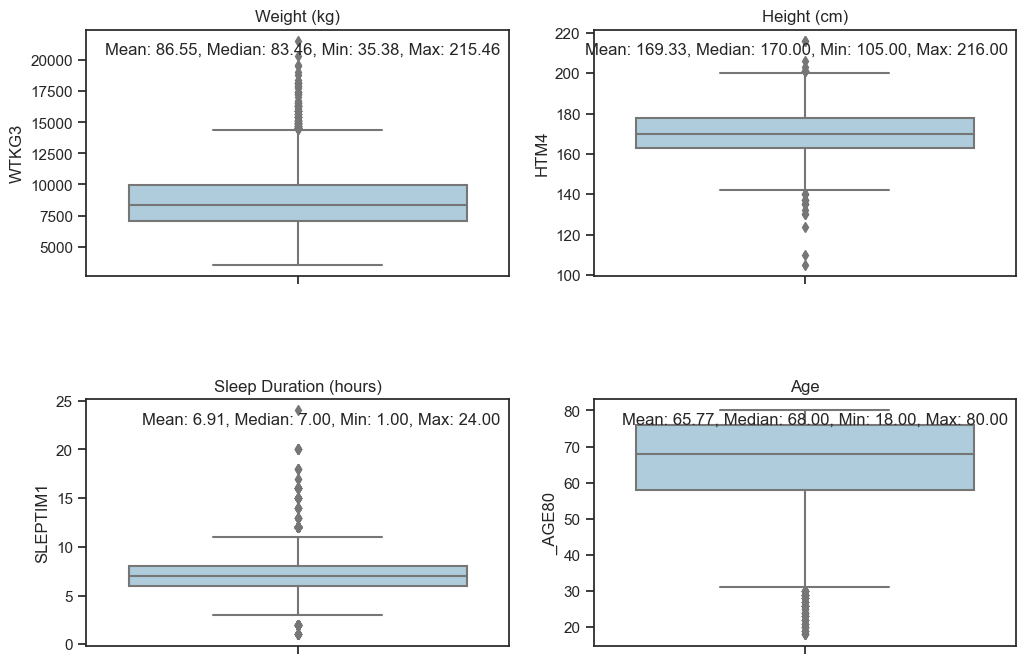

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Weight
weight_stats = physical_health_bad_20_days_cvd['WTKG3'].describe()
sns.boxplot(y='WTKG3', data=physical_health_bad_20_days_cvd, ax=axes[0, 0])
axes[0, 0].set_title('Weight (kg)')
axes[0, 0].set_xlabel('')
axes[0, 0].text(0.98, 0.95, f'Mean: {weight_stats["mean"]/100:.2f}, Median: {weight_stats["50%"]/100:.2f}, Min: {weight_stats["min"]/100:.2f}, Max: {weight_stats["max"]/100:.2f}', transform=axes[0, 0].transAxes, ha='right', va='top')

# Height
height_stats = physical_health_bad_20_days_cvd['HTM4'].describe()
sns.boxplot(y='HTM4', data=physical_health_bad_20_days_cvd, ax=axes[0, 1])
axes[0, 1].set_title('Height (cm)')
axes[0, 1].set_xlabel('')
axes[0, 1].text(0.98, 0.95, f'Mean: {height_stats["mean"]:.2f}, Median: {height_stats["50%"]:.2f}, Min: {height_stats["min"]:.2f}, Max: {height_stats["max"]:.2f}', transform=axes[0, 1].transAxes, ha='right', va='top')

# Sleep Duration
sleep_stats = physical_health_bad_20_days_cvd['SLEPTIM1'].describe()
sns.boxplot(y='SLEPTIM1', data=physical_health_bad_20_days_cvd, ax=axes[1, 0])
axes[1, 0].set_title('Sleep Duration (hours)')
axes[1, 0].set_xlabel('')
axes[1, 0].text(0.98, 0.95, f'Mean: {sleep_stats["mean"]:.2f}, Median: {sleep_stats["50%"]:.2f}, Min: {sleep_stats["min"]:.2f}, Max: {sleep_stats["max"]:.2f}', transform=axes[1, 0].transAxes, ha='right', va='top')

# Age
age_stats = physical_health_bad_20_days_cvd['_AGE80'].describe()
sns.boxplot(y='_AGE80', data=physical_health_bad_20_days_cvd, ax=axes[1, 1])
axes[1, 1].set_title('Age')
axes[1, 1].set_xlabel('')
axes[1, 1].text(0.98, 0.95, f'Mean: {age_stats["mean"]:.2f}, Median: {age_stats["50%"]:.2f}, Min: {age_stats["min"]:.2f}, Max: {age_stats["max"]:.2f}', transform=axes[1, 1].transAxes, ha='right', va='top')

plt.subplots_adjust(hspace=0.5)
plt.show()

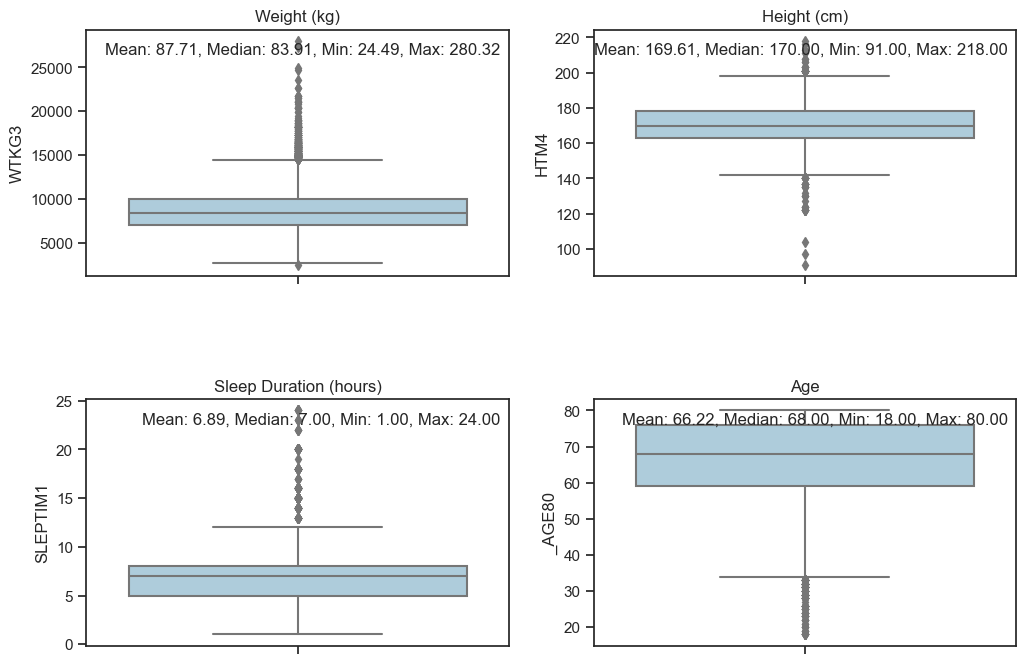

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Weight
weight_stats = physical_health_bad_30_days_cvd['WTKG3'].describe()
sns.boxplot(y='WTKG3', data=physical_health_bad_30_days_cvd, ax=axes[0, 0])
axes[0, 0].set_title('Weight (kg)')
axes[0, 0].set_xlabel('')
axes[0, 0].text(0.98, 0.95, f'Mean: {weight_stats["mean"]/100:.2f}, Median: {weight_stats["50%"]/100:.2f}, Min: {weight_stats["min"]/100:.2f}, Max: {weight_stats["max"]/100:.2f}', transform=axes[0, 0].transAxes, ha='right', va='top')

# Height
height_stats = physical_health_bad_30_days_cvd['HTM4'].describe()
sns.boxplot(y='HTM4', data=physical_health_bad_30_days_cvd, ax=axes[0, 1])
axes[0, 1].set_title('Height (cm)')
axes[0, 1].set_xlabel('')
axes[0, 1].text(0.98, 0.95, f'Mean: {height_stats["mean"]:.2f}, Median: {height_stats["50%"]:.2f}, Min: {height_stats["min"]:.2f}, Max: {height_stats["max"]:.2f}', transform=axes[0, 1].transAxes, ha='right', va='top')

# Sleep Duration
sleep_stats = physical_health_bad_30_days_cvd['SLEPTIM1'].describe()
sns.boxplot(y='SLEPTIM1', data=physical_health_bad_30_days_cvd, ax=axes[1, 0])
axes[1, 0].set_title('Sleep Duration (hours)')
axes[1, 0].set_xlabel('')
axes[1, 0].text(0.98, 0.95, f'Mean: {sleep_stats["mean"]:.2f}, Median: {sleep_stats["50%"]:.2f}, Min: {sleep_stats["min"]:.2f}, Max: {sleep_stats["max"]:.2f}', transform=axes[1, 0].transAxes, ha='right', va='top')

# Age
age_stats = physical_health_bad_30_days_cvd['_AGE80'].describe()
sns.boxplot(y='_AGE80', data=physical_health_bad_30_days_cvd, ax=axes[1, 1])
axes[1, 1].set_title('Age')
axes[1, 1].set_xlabel('')
axes[1, 1].text(0.98, 0.95, f'Mean: {age_stats["mean"]:.2f}, Median: {age_stats["50%"]:.2f}, Min: {age_stats["min"]:.2f}, Max: {age_stats["max"]:.2f}', transform=axes[1, 1].transAxes, ha='right', va='top')

plt.subplots_adjust(hspace=0.5)
plt.show()

In [34]:
print(df['_AGE80'])

0         80.0
1         80.0
2         56.0
3         73.0
4         43.0
          ... 
445127    19.0
445128    51.0
445129    65.0
445130    73.0
445131    42.0
Name: _AGE80, Length: 445132, dtype: float64


In [35]:
healthy_ppl = df[(df['PHYSHLTH'] <= 5) & (df['PHYSHLTH'] >= 0) & (~df['SLEPTIM1'].isin([77, 99])) & ((df['CVDCRHD4'] != 1) & (df['CVDINFR4'] != 1) & (df['CVDSTRK3'] != 1))].copy()


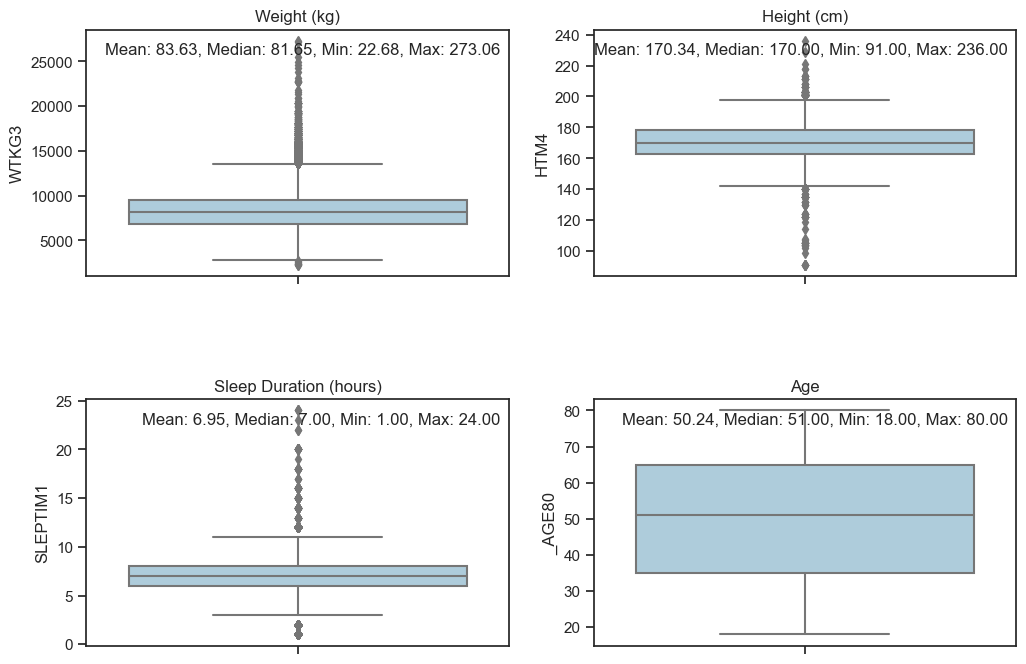

In [36]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Weight
weight_stats = healthy_ppl['WTKG3'].describe()
sns.boxplot(y='WTKG3', data=healthy_ppl, ax=axes[0, 0])
axes[0, 0].set_title('Weight (kg)')
axes[0, 0].set_xlabel('')
axes[0, 0].text(0.98, 0.95, f'Mean: {weight_stats["mean"]/100:.2f}, Median: {weight_stats["50%"]/100:.2f}, Min: {weight_stats["min"]/100:.2f}, Max: {weight_stats["max"]/100:.2f}', transform=axes[0, 0].transAxes, ha='right', va='top')

# Height
height_stats = healthy_ppl['HTM4'].describe()
sns.boxplot(y='HTM4', data=healthy_ppl, ax=axes[0, 1])
axes[0, 1].set_title('Height (cm)')
axes[0, 1].set_xlabel('')
axes[0, 1].text(0.98, 0.95, f'Mean: {height_stats["mean"]:.2f}, Median: {height_stats["50%"]:.2f}, Min: {height_stats["min"]:.2f}, Max: {height_stats["max"]:.2f}', transform=axes[0, 1].transAxes, ha='right', va='top')

# Sleep Duration
sleep_stats = healthy_ppl['SLEPTIM1'].describe()
sns.boxplot(y='SLEPTIM1', data=healthy_ppl, ax=axes[1, 0])
axes[1, 0].set_title('Sleep Duration (hours)')
axes[1, 0].set_xlabel('')
axes[1, 0].text(0.98, 0.95, f'Mean: {sleep_stats["mean"]:.2f}, Median: {sleep_stats["50%"]:.2f}, Min: {sleep_stats["min"]:.2f}, Max: {sleep_stats["max"]:.2f}', transform=axes[1, 0].transAxes, ha='right', va='top')

# Age
age_stats = healthy_ppl['_AGE80'].describe()
sns.boxplot(y='_AGE80', data=healthy_ppl, ax=axes[1, 1])
axes[1, 1].set_title('Age')
axes[1, 1].set_xlabel('')
axes[1, 1].text(0.98, 0.95, f'Mean: {age_stats["mean"]:.2f}, Median: {age_stats["50%"]:.2f}, Min: {age_stats["min"]:.2f}, Max: {age_stats["max"]:.2f}', transform=axes[1, 1].transAxes, ha='right', va='top')

plt.subplots_adjust(hspace=0.5)
plt.show()

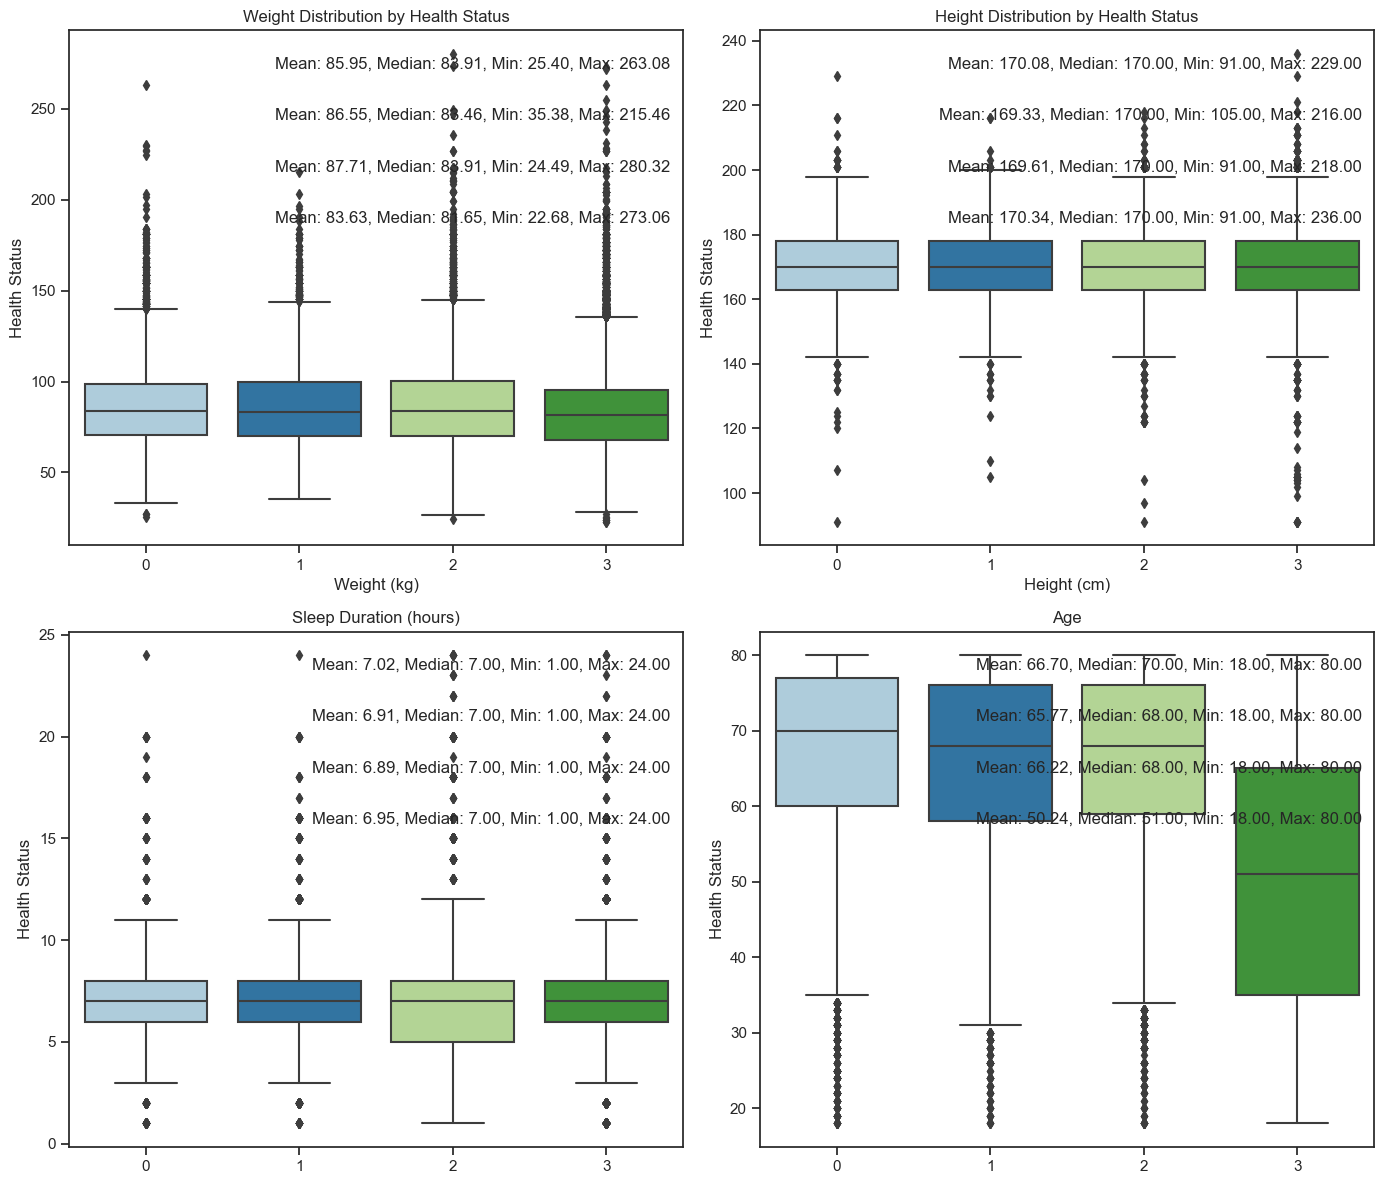

In [40]:
weight_stats_10 = physical_health_bad_10_days_cvd['WTKG3'].describe() / 100
weight_stats_20 = physical_health_bad_20_days_cvd['WTKG3'].describe() / 100
weight_stats_30 = physical_health_bad_30_days_cvd['WTKG3'].describe() / 100
weight_stats_all = healthy_ppl['WTKG3'].describe() / 100

height_stats_10 = physical_health_bad_10_days_cvd['HTM4'].describe()
height_stats_20 = physical_health_bad_20_days_cvd['HTM4'].describe()
height_stats_30 = physical_health_bad_30_days_cvd['HTM4'].describe()
height_stats_all = healthy_ppl['HTM4'].describe()


sleep_stats_10 = physical_health_bad_10_days_cvd['SLEPTIM1'].describe()
sleep_stats_20 = physical_health_bad_20_days_cvd['SLEPTIM1'].describe()
sleep_stats_30 = physical_health_bad_30_days_cvd['SLEPTIM1'].describe()
sleep_stats_all = healthy_ppl['SLEPTIM1'].describe()


age_stats_10 = physical_health_bad_10_days_cvd['_AGE80'].describe()
age_stats_20 = physical_health_bad_20_days_cvd['_AGE80'].describe()
age_stats_30 = physical_health_bad_30_days_cvd['_AGE80'].describe()
age_stats_all = healthy_ppl['_AGE80'].describe()


fig, axes = plt.subplots(2, 2, figsize=(14, 12))


sns.boxplot(data=[physical_health_bad_10_days_cvd['WTKG3'] / 100,
                  physical_health_bad_20_days_cvd['WTKG3'] / 100,
                  physical_health_bad_30_days_cvd['WTKG3'] / 100,
                  healthy_ppl['WTKG3'] / 100],
            ax=axes[0, 0])
axes[0, 0].set_title('Weight Distribution by Health Status')
axes[0, 0].set_xlabel('Weight (kg)')
axes[0, 0].set_ylabel('Health Status')

for i, stats in enumerate([weight_stats_10, weight_stats_20, weight_stats_30, weight_stats_all]):
    axes[0, 0].text(0.98, 0.95 - i * 0.1, 
                 f'Mean: {stats["mean"]:.2f}, Median: {stats["50%"]:.2f}, Min: {stats["min"]:.2f}, Max: {stats["max"]:.2f}', 
                 transform=axes[0, 0].transAxes, ha='right', va='top')

sns.boxplot(data=[physical_health_bad_10_days_cvd['HTM4'],
                  physical_health_bad_20_days_cvd['HTM4'],
                  physical_health_bad_30_days_cvd['HTM4'],
                  healthy_ppl['HTM4']],
            ax=axes[0, 1])
axes[0, 1].set_title('Height Distribution by Health Status')
axes[0, 1].set_xlabel('Height (cm)')
axes[0, 1].set_ylabel('Health Status')

for i, stats in enumerate([height_stats_10, height_stats_20, height_stats_30, height_stats_all]):
    axes[0, 1].text(0.98, 0.95 - i * 0.1, 
                 f'Mean: {stats["mean"]:.2f}, Median: {stats["50%"]:.2f}, Min: {stats["min"]:.2f}, Max: {stats["max"]:.2f}', 
                 transform=axes[0, 1].transAxes, ha='right', va='top')


sns.boxplot(data=[physical_health_bad_10_days_cvd['SLEPTIM1'],
                  physical_health_bad_20_days_cvd['SLEPTIM1'],
                  physical_health_bad_30_days_cvd['SLEPTIM1'],
                  healthy_ppl['SLEPTIM1']],
            ax=axes[1, 0])
axes[1, 0].set_title('Sleep Duration (hours)')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('Health Status')

for i, stats in enumerate([sleep_stats_10, sleep_stats_20, sleep_stats_30, sleep_stats_all]):
    axes[1, 0].text(0.98, 0.95 - i * 0.1, 
                 f'Mean: {stats["mean"]:.2f}, Median: {stats["50%"]:.2f}, Min: {stats["min"]:.2f}, Max: {stats["max"]:.2f}', 
                 transform=axes[1, 0].transAxes, ha='right', va='top')

sns.boxplot(data=[physical_health_bad_10_days_cvd['_AGE80'],
                  physical_health_bad_20_days_cvd['_AGE80'],
                  physical_health_bad_30_days_cvd['_AGE80'],
                  healthy_ppl['_AGE80']],
            ax=axes[1, 1])
axes[1, 1].set_title('Age')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Health Status')

for i, stats in enumerate([age_stats_10, age_stats_20, age_stats_30, age_stats_all]):
    axes[1, 1].text(0.98, 0.95 - i * 0.1, 
                 f'Mean: {stats["mean"]:.2f}, Median: {stats["50%"]:.2f}, Min: {stats["min"]:.2f}, Max: {stats["max"]:.2f}', 
                 transform=axes[1, 1].transAxes, ha='right', va='top')

plt.tight_layout()
plt.show()
